## Experiment 1 -> Drop vs Impute .

In [ ]:
%pip install mlflow dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.4/647.4 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [71]:
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import mlflow

In [72]:
import dagshub
dagshub.init(repo_owner='mukeshjangid7877', repo_name='zomato-delivery-time-prediction', mlflow=True)


Initialized MLflow to track repo "mukeshjangid7877/zomato-delivery-time-prediction"

Repository mukeshjangid7877/zomato-delivery-time-prediction initialized!

In [73]:
df = pd.read_csv('/content/cleaned_data.csv')

In [74]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather_conditions,traffic,...,time_taken (min),city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,Fog,jam,...,46,DEH,2,12,friday,0,15.0,21.0,night,10.28
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,high,...,23,KOC,13,2,sunday,1,10.0,14.0,afternoon,6.24
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,Sandstorms,medium,...,21,PUNE,3,4,sunday,1,10.0,17.0,evening,13.79
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,low,...,20,LUDH,13,2,sunday,1,10.0,9.0,morning,2.93
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,jam,...,41,KNP,14,2,monday,0,15.0,19.0,evening,19.40


In [75]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken (min),is_weekend,pickup_time_minutes,order_time_of_day,distance
0,36.0,4.2,Fog,jam,2,snack,motorcycle,3.0,no,metropolitian,46,0,15.0,night,10.28
1,21.0,4.7,Stormy,high,1,meal,motorcycle,1.0,no,metropolitian,23,1,10.0,afternoon,6.24
2,23.0,4.7,Sandstorms,medium,1,drinks,scooter,1.0,no,metropolitian,21,1,10.0,evening,13.79
3,34.0,4.3,Sandstorms,low,0,buffet,motorcycle,0.0,no,metropolitian,20,1,10.0,morning,2.93
4,24.0,4.7,Fog,jam,1,snack,scooter,1.0,no,metropolitian,41,0,15.0,evening,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45488,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.49
45489,21.0,4.6,Windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN
45490,30.0,4.9,Cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,NaN,night,4.66
45491,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,1,5.0,afternoon,6.23


In [76]:
df.isna().sum()

,0
age,1854
ratings,1908
weather_conditions,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


<Axes: >

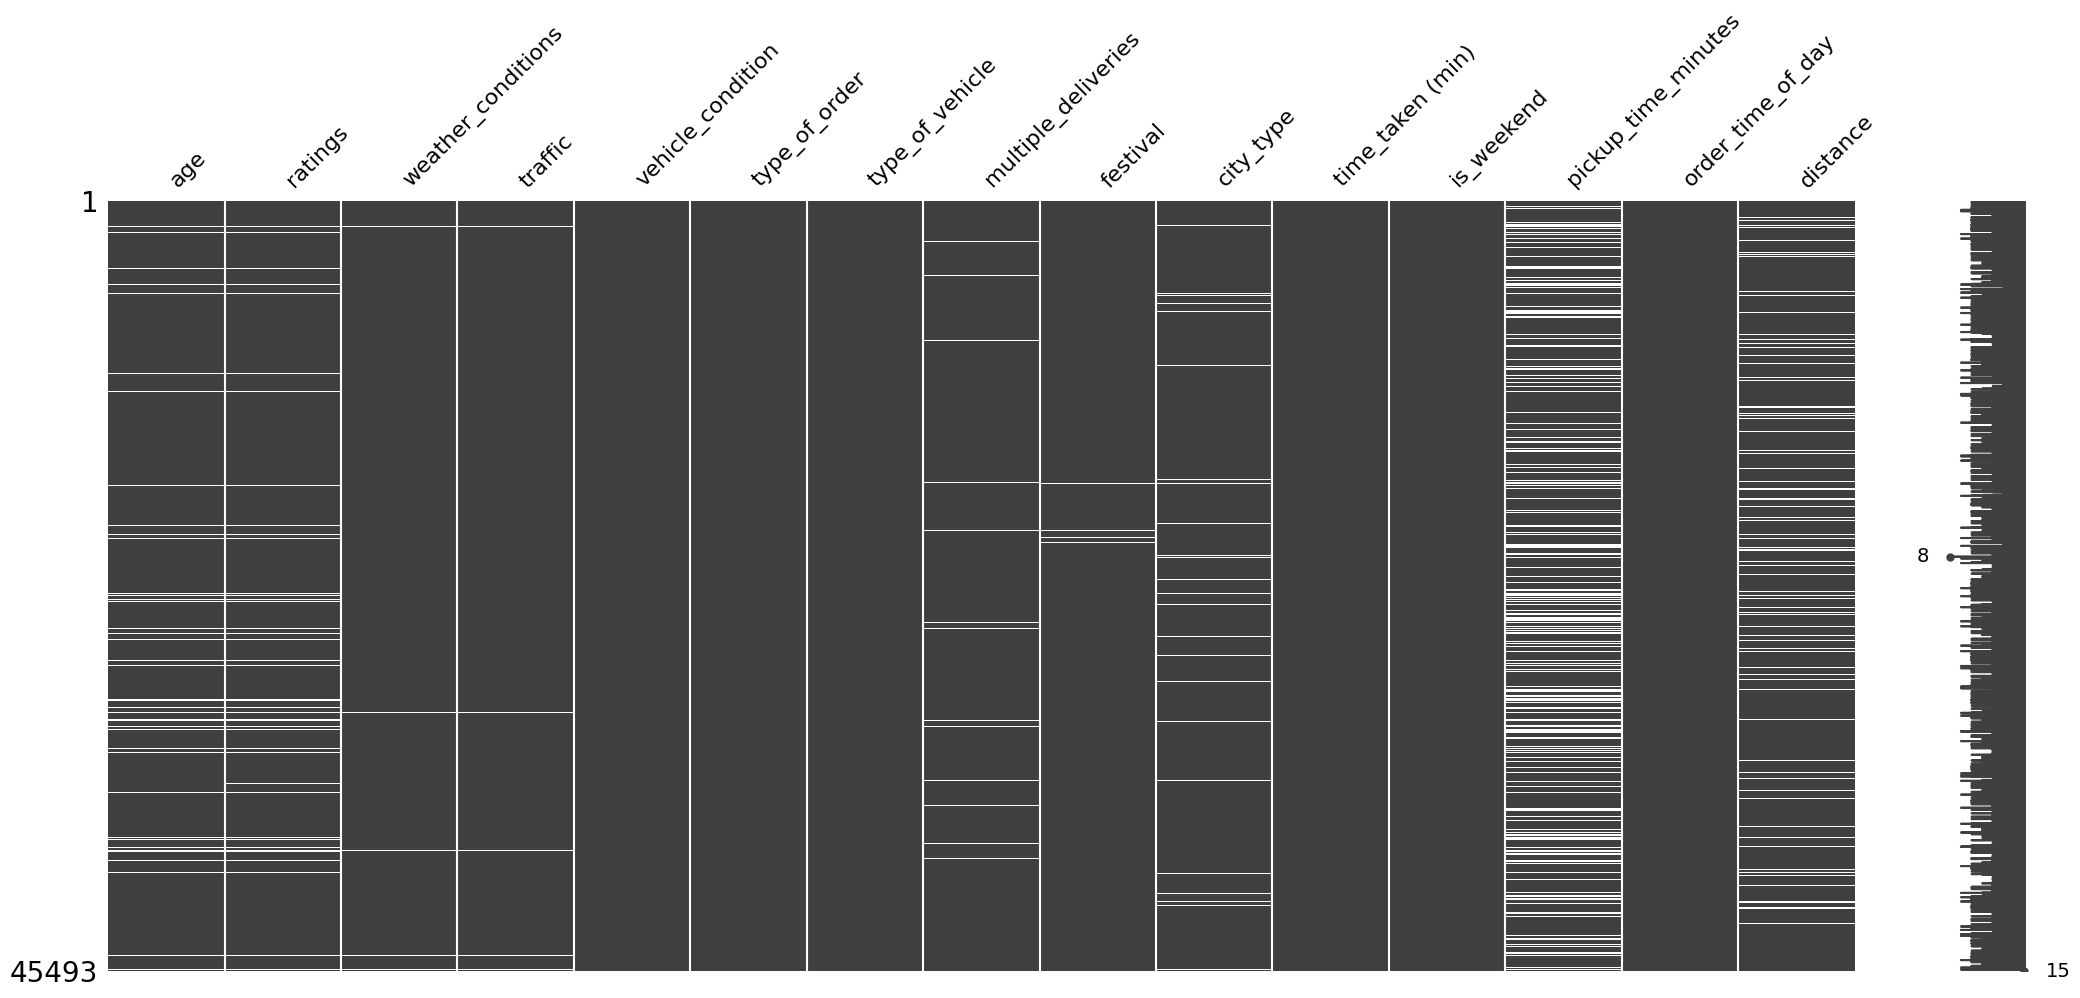

In [77]:
msno.matrix(df)

<Axes: >

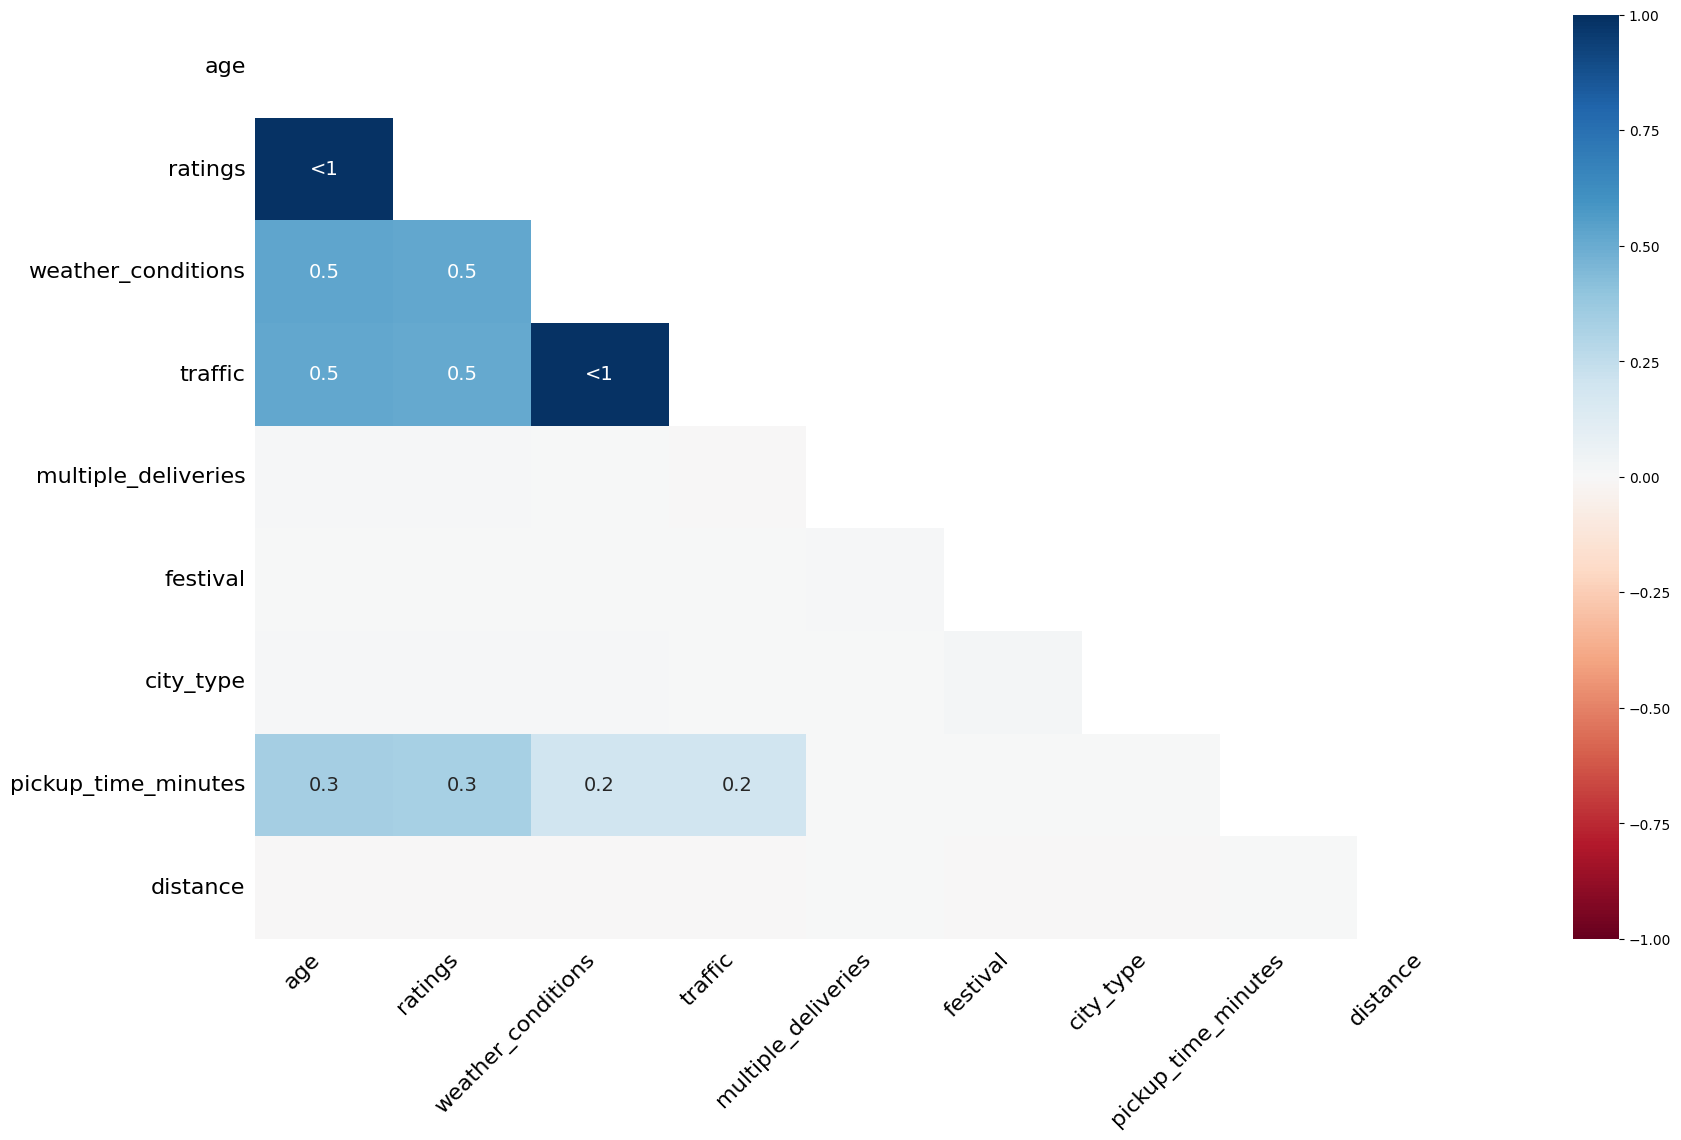

In [78]:
msno.heatmap(df)

**Observations**
* `age` and `ratings` have a high coorelation , they have a pattern in missing
* `traffic` and `weather_conditions` have a high corr
* [`weather_conditions`, `age` and `ratings`]  have  correlation

  **the missing values are `MNAR`- `[Missing not at Random]`**

<Axes: >

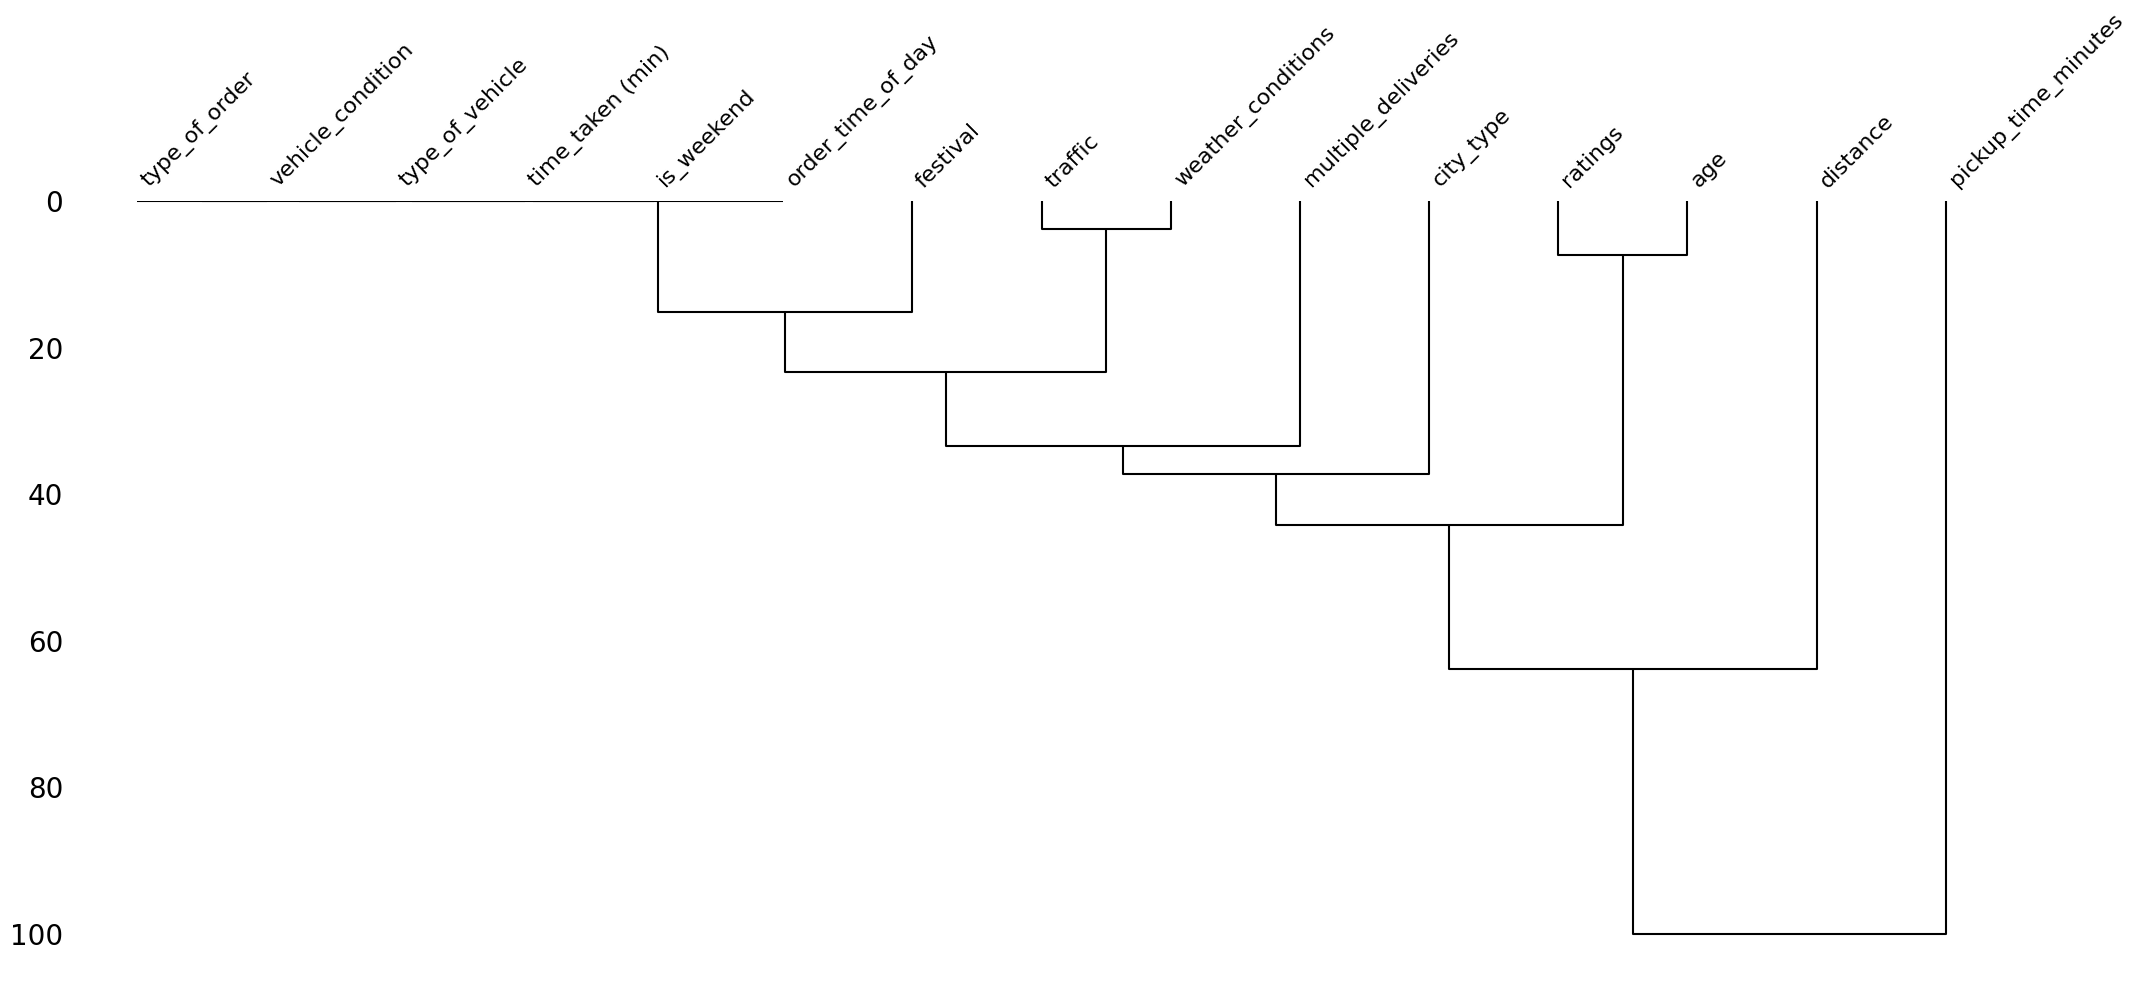

In [79]:
msno.dendrogram(df)

In [80]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'distance'],
      dtype='object')

## Drop Missing Values

In [81]:
# set the tracking server

mlflow.set_tracking_uri("https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow")


In [82]:
mlflow.set_experiment("Exp : Drop Vs Impute Missing Values")

<Experiment: artifact_location='mlflow-artifacts:/1e2923ab82e342d7882e1fefd3800562', creation_time=1738916339614, experiment_id='0', last_update_time=1738916339614, lifecycle_stage='active', name='Exp : Drop Vs Impute Missing Values', tags={}>

In [83]:
## Creating a copy and dropping

temp_df = df.copy().dropna()

In [84]:
# split into X and y

X = temp_df.drop(columns='time_taken (min)')
y = temp_df['time_taken (min)']

X

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance
0,36.0,4.2,Fog,jam,2,snack,motorcycle,3.0,no,metropolitian,0,15.0,night,10.28
1,21.0,4.7,Stormy,high,1,meal,motorcycle,1.0,no,metropolitian,1,10.0,afternoon,6.24
2,23.0,4.7,Sandstorms,medium,1,drinks,scooter,1.0,no,metropolitian,1,10.0,evening,13.79
3,34.0,4.3,Sandstorms,low,0,buffet,motorcycle,0.0,no,metropolitian,1,10.0,morning,2.93
4,24.0,4.7,Fog,jam,1,snack,scooter,1.0,no,metropolitian,0,15.0,evening,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45485,30.0,4.2,Cloudy,medium,1,snack,motorcycle,2.0,yes,metropolitian,0,15.0,evening,10.45
45487,35.0,4.2,Windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,0,10.0,night,16.60
45488,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.49
45491,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,1,5.0,afternoon,6.23


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [86]:
print(X_train.shape)
print(X_test.shape)

(24604, 14)
(6151, 14)


In [87]:
X_train.isna().sum()

,0
age,0
ratings,0
weather_conditions,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [88]:
# columns
X_train.shape[1]

14

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24604 entries, 17762 to 34975
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  24604 non-null  float64
 1   ratings              24604 non-null  float64
 2   weather_conditions   24604 non-null  object 
 3   traffic              24604 non-null  object 
 4   vehicle_condition    24604 non-null  int64  
 5   type_of_order        24604 non-null  object 
 6   type_of_vehicle      24604 non-null  object 
 7   multiple_deliveries  24604 non-null  float64
 8   festival             24604 non-null  object 
 9   city_type            24604 non-null  object 
 10  is_weekend           24604 non-null  int64  
 11  pickup_time_minutes  24604 non-null  float64
 12  order_time_of_day    24604 non-null  object 
 13  distance             24604 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 2.8+ MB


In [90]:
# Assingning the columns

num_cols = ['age', 'ratings', 'pickup_time_minutes', 'distance']

nominal_cat_cols = ["weather_conditions", "type_of_order",
                    "type_of_vehicle","festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ['traffic']


In [91]:
len(num_cols + nominal_cat_cols + ordinal_cat_cols)

12

In [92]:
for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['medium' 'high' 'jam' 'low']


In [93]:
traffic_order = ["low","medium","high","jam"]

# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order]), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'festival', 'city_type',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam']]),
                                 ['traffic'])],
                  verbose_feature_names_out=False)

In [94]:
# transform the data

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans


,age,ratings,pickup_time_minutes,distance,weather_conditions_Fog,weather_conditions_Sandstorms,weather_conditions_Stormy,weather_conditions_Sunny,weather_conditions_Windy,type_of_order_drinks,...,festival_yes,city_type_semi-urban,city_type_urban,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,vehicle_condition,multiple_deliveries
17762,0.315789,0.84,0.5,0.390769,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0
36765,0.947368,0.80,0.5,0.077436,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2,0.0
28621,0.263158,0.84,1.0,0.777949,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0,2.0
19874,0.210526,0.84,1.0,0.482051,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2,0.0
14210,0.842105,0.92,0.5,0.470256,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44100,0.105263,0.92,1.0,0.004103,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2,0.0
7984,0.684211,0.96,1.0,0.468205,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.0
1289,0.684211,0.60,0.5,0.402051,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2,1.0
23284,0.736842,0.96,1.0,0.004103,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1,1.0


In [95]:
## Transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.fit_transform(y_test.values.reshape(-1,1))


In [96]:
# Random forest
rf = RandomForestRegressor()

rf.fit(X_train_trans,y_train_pt.ravel())

RandomForestRegressor()

In [97]:
# Ger=tting the Predictions :

y_pred_train = rf.predict(X_train_trans)
y_pred_test = rf.predict(X_test_trans)

In [98]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [99]:

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.15 minutes
The test error is 3.13 minutes


In [100]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.98
The test r2 score is 0.83


In [101]:
# calculate the cross val score

scores = cross_val_score(rf, X_train_trans, y_train_pt.ravel(), cv=5,scoring="r2", n_jobs=-1)

scores

array([0.80910914, 0.80763929, 0.80030228, 0.80671819, 0.8114985 ])

In [102]:
scores.mean()

0.8070534786353244

<Axes: >

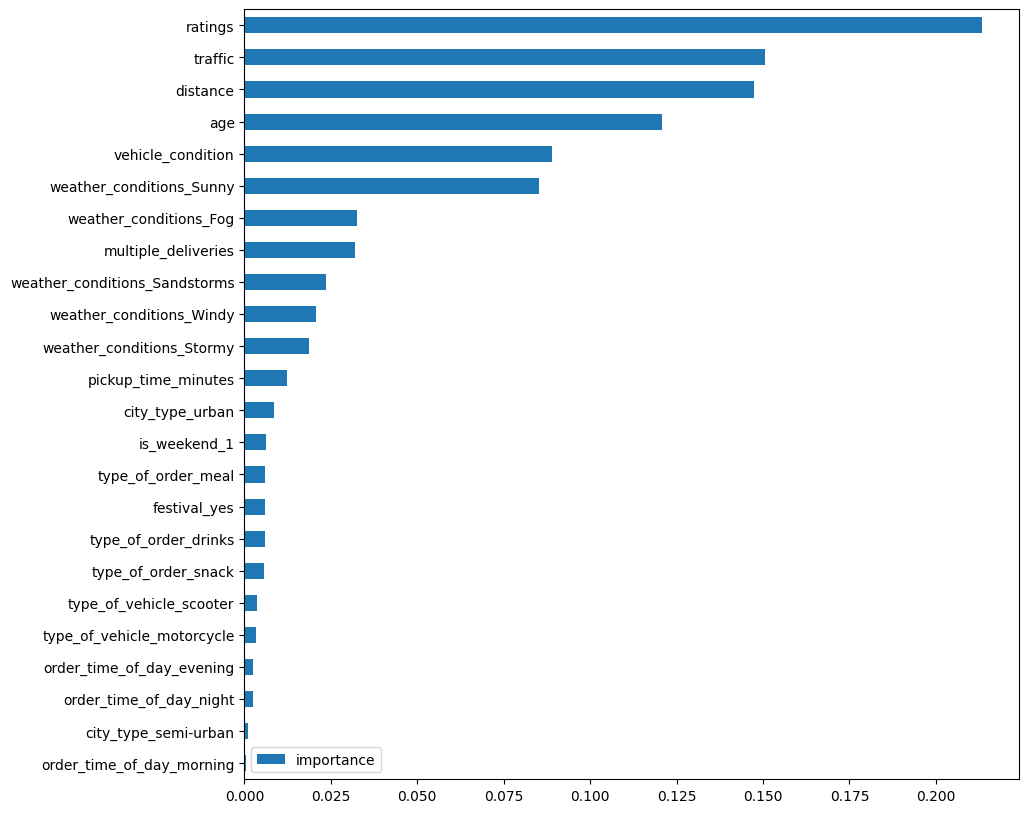

In [103]:
# feature importance plot

(
    pd.DataFrame(rf.feature_importances_,
             index=X_train_trans.columns,
             columns=["importance"])
    .sort_values(by="importance")
    .plot(kind='barh',figsize=(10,10))
)


In [104]:
# log experiment

with mlflow.start_run(run_name="Drop Missing Values"):
    # mlflow log experiment type
    mlflow.log_param("experiment_type","Drop Missing Values")
    # log model params
    mlflow.log_params(rf.get_params())

    # log metrics
    mlflow.log_metric("training_error",mean_absolute_error(y_train,y_pred_train_org))
    mlflow.log_metric("test_error",mean_absolute_error(y_test,y_pred_test_org))
    mlflow.log_metric("training_r2",r2_score(y_train,y_pred_train_org))
    mlflow.log_metric("test_r2",r2_score(y_test,y_pred_test_org))
    mlflow.log_metric("cross_val",scores.mean())


🏃 View run Drop Missing Values at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/0/runs/dcbd0eaa63254706b9a37990e2d4d3e8
🧪 View experiment at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/0


In [105]:
from sklearn.feature_selection import RFECV

# feature selection using rfecv

rfecv = RFECV(
    estimator=rf,
    step=10,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# select features

rfecv.fit(X_train_trans,y_train_pt.ravel())

RFECV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1, scoring='r2', step=10,
      verbose=2)

In [106]:
# list of selected features

rfecv.get_feature_names_out()
rf = RandomForestRegressor()

rf.fit(rfecv.transform(X_train_trans),y_train_pt.ravel())

RandomForestRegressor()

In [107]:
# get the predictions
y_pred_train = rf.predict(rfecv.transform(X_train_trans))
y_pred_test = rf.predict(rfecv.transform(X_test_trans))

# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))


print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train error is 1.15 minutes
The test error is 3.14 minutes
The train r2 score is 0.98
The test r2 score is 0.83


In [108]:
# calculate the cross val score
scores = cross_val_score(rf,rfecv.transform(X_train_trans),y_train_pt.ravel(),cv=5,scoring="r2",n_jobs=-1)

scores

array([0.81001429, 0.80870738, 0.79946845, 0.80667077, 0.81063207])

In [109]:
scores.mean()

0.8070985922127459

In [111]:
rf.feature_importances_

array([0.12107321, 0.21289138, 0.01237835, 0.14724826, 0.03268427,
       0.02370321, 0.01854922, 0.08599454, 0.02115846, 0.00591114,
       0.0060957 , 0.00579517, 0.00350015, 0.00367069, 0.00636174,
       0.00120205, 0.00834595, 0.00634728, 0.00258732, 0.00061151,
       0.00245162, 0.15122119, 0.08922609, 0.03099151])

In [112]:
X_train_trans.shape

(24604, 24)

## Impute missing values :

In [113]:
temp_df = df.copy()

In [114]:
temp_df.isna().sum()

,0
age,1854
ratings,1908
weather_conditions,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


In [115]:
# split into X and y

X = temp_df.drop(columns='time_taken (min)')
y = temp_df['time_taken (min)']

X

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance
0,36.0,4.2,Fog,jam,2,snack,motorcycle,3.0,no,metropolitian,0,15.0,night,10.28
1,21.0,4.7,Stormy,high,1,meal,motorcycle,1.0,no,metropolitian,1,10.0,afternoon,6.24
2,23.0,4.7,Sandstorms,medium,1,drinks,scooter,1.0,no,metropolitian,1,10.0,evening,13.79
3,34.0,4.3,Sandstorms,low,0,buffet,motorcycle,0.0,no,metropolitian,1,10.0,morning,2.93
4,24.0,4.7,Fog,jam,1,snack,scooter,1.0,no,metropolitian,0,15.0,evening,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45488,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.49
45489,21.0,4.6,Windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,0,15.0,evening,NaN
45490,30.0,4.9,Cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,NaN,night,4.66
45491,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,1,5.0,afternoon,6.23


In [116]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

missing_cols

Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'distance'],
      dtype='object')

In [118]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)

32.0

In [119]:
# features to fill values with mode

features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather_conditions',
 'type_of_order',
 'type_of_vehicle',
 'is_weekend',
 'order_time_of_day']

In [120]:
# simple imputer to fill categorical vars with mode

simple_imputer = ColumnTransformer(transformers=[
    ("mode_imputer",SimpleImputer(strategy="most_frequent"),features_to_fill_mode),
    ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing"),features_to_fill_missing)
],remainder="passthrough",n_jobs=-1,verbose_feature_names_out=False)

simple_imputer.set_output(transform="pandas")
simple_imputer.fit_transform(X_train)

,multiple_deliveries,festival,city_type,weather_conditions,type_of_order,type_of_vehicle,is_weekend,order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance
22461,1.0,no,metropolitian,Stormy,buffet,motorcycle,0,night,33.0,4.8,low,2,5.0,17.10
21478,1.0,no,metropolitian,Windy,meal,motorcycle,0,evening,22.0,4.6,medium,0,15.0,16.60
25583,2.0,no,metropolitian,Cloudy,meal,motorcycle,1,night,20.0,4.9,jam,0,10.0,12.44
28953,1.0,no,urban,missing,snack,scooter,0,after_midnight,NaN,NaN,NaN,3,NaN,4.67
42949,1.0,no,metropolitian,Fog,buffet,scooter,0,morning,29.0,4.7,high,1,5.0,2.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,no,urban,Sandstorms,drinks,scooter,0,night,32.0,5.0,jam,1,5.0,10.70
44732,0.0,no,metropolitian,Sunny,meal,motorcycle,0,morning,21.0,4.6,high,1,5.0,3.11
38158,1.0,no,urban,Cloudy,buffet,motorcycle,1,evening,37.0,4.9,medium,0,10.0,9.07
860,1.0,no,metropolitian,Stormy,buffet,motorcycle,1,evening,27.0,4.4,medium,0,5.0,10.71


In [121]:
simple_imputer.fit_transform(X_train).isna().sum()

,0
multiple_deliveries,0
festival,0
city_type,0
weather_conditions,0
type_of_order,0
type_of_vehicle,0
is_weekend,0
order_time_of_day,0
age,1478
ratings,1520


In [122]:
columns_to_drop

['rider_id',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'order_date',
 'order_time_hour',
 'order_day',
 'city_name',
 'order_day_of_week',
 'order_month']

In [123]:
# knn imputer

knn_imputer = KNNImputer(n_neighbors=5)

In [124]:
# Define your columns
num_cols = ["age", "ratings", "pickup_time_minutes", "distance"]

nominal_cat_cols = [
    "weather_conditions", "type_of_order", "type_of_vehicle",
    "festival", "city_type",
    "is_weekend", "order_time_of_day"
]

ordinal_cat_cols = ["traffic"]

traffic_order = ["Low", "Medium", "High", "Very High"]

In [125]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['low' 'medium' 'jam' nan 'high']


In [126]:
# Alternatively, you could choose to drop or impute them differently.
X_train["traffic"] = X_train["traffic"].fillna("Unknown")


# Creating the preprocessor with a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", MinMaxScaler(), num_cols),
        ("nominal_encode", OneHotEncoder(
            drop="first",
            handle_unknown="ignore",
            sparse_output=False
        ), nominal_cat_cols),
        ("ordinal_encode", OrdinalEncoder(
            categories=[traffic_order],
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ), ordinal_cat_cols)
    ],
    remainder="passthrough",  # Pass through any columns not specified
    n_jobs= 1,
    verbose_feature_names_out=False
)

preprocessor.set_output(transform="pandas")

ColumnTransformer(n_jobs=1, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'festival', 'city_type',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['Low', 'Medium',
                                                             'High',
                                                             'Very High']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic'])],
                  verbose_feature_names_out=False)

In [127]:
X_train.columns

Index(['age', 'ratings', 'weather_conditions', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'is_weekend', 'pickup_time_minutes', 'order_time_of_day',
       'distance'],
      dtype='object')

In [128]:
# Fit and transform the training data.
X_train_transformed = preprocessor.fit_transform(X_train)

preprocessor

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(n_jobs=1, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'festival', 'city_type',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['Low', 'Medium',
                                                             'High',
                                                             'Very High']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic'])],
                  verbose_feature_names_out=False)

In [129]:
X_train_transformed.isna().sum().loc[lambda ser : ser.ge(1)]

,0
age,1478
ratings,1520
pickup_time_minutes,8085
distance,2875
multiple_deliveries,790


In [130]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor),
                                ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather_conditions',
                                                   'type_of_order',
                                                   'type_of_vehicle',
                                                   'is_weekend',
                                                   'o...
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather_conditions',
                                                   'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High',
                                                                              'Very '
                                                                              'High']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [131]:
model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",rf)
                            ])

model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weather_conditions',
                                                                    'type_of_order',...
                                                                   ['weather_conditions',
                                                                    'type_of_order',
                                                                    'type_of_vehicle',
                                                                    'festival',
                                                                    'city_type',
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                                                               'High']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [132]:
# fit the pipeline on data

model_pipe.fit(X_train,y_train_pt.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weather_conditions',
                                                                    'type_of_order',...
                                                                   ['weather_conditions',
                                                                    'type_of_order',
                                                                    'type_of_vehicle',
                                                                    'festival',
                                                                    'city_type',
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                                                               'High']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [133]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)



In [134]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))


print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train error is 1.55 minutes
The test error is 4.14 minutes
The train r2 score is 0.95
The test r2 score is 0.66


In [137]:

scores = cross_val_score(model_pipe,X_train,y_train_pt.ravel(),cv= 3,scoring="r2",n_jobs=-1)

print("cv = ",scores)
print(f"average value is {scores.mean()}")

cv =  [0.63309197 0.63400814 0.64311328]
average value is 0.6367377946068665


In [138]:
# log experiment

with mlflow.start_run(run_name="Impute Missing Values"):
    # mlflow log experiment type
    mlflow.log_param("experiment_type","Impute Missing Values")
    # log model params
    mlflow.log_params(rf.get_params())

    # log metrics
    mlflow.log_metric("training_error",mean_absolute_error(y_train,y_pred_train_org))
    mlflow.log_metric("test_error",mean_absolute_error(y_test,y_pred_test_org))
    mlflow.log_metric("training_r2",r2_score(y_train,y_pred_train_org))
    mlflow.log_metric("test_r2",r2_score(y_test,y_pred_test_org))
    mlflow.log_metric("cross_val",scores.mean())

🏃 View run Impute Missing Values at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/0/runs/91acda1574db4443beea19d257e5253b
🧪 View experiment at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/0
